# ULTIMATE DATA SCIENCE CHALLENGE 3 #
***

In [98]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

### PART 1: EXPLORATORY DATA ANALYSIS
***

In [99]:
logins_df = pd.read_json("logins.json")

In [100]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [101]:
logins_df.dtypes

login_time    datetime64[ns]
dtype: object

In [102]:
logins_df.set_index('login_time')

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [103]:
# Aggregate datetimes into 15min intervals
logins_15min_agg = logins_df.resample(rule='15min', on='login_time',).agg({'login_time': 'count'})

In [104]:
logins_15min_agg.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [105]:
logins_15min_agg.rename(columns={'login_time': 'num_of_logins'}, inplace=True)

In [106]:
logins_15min_agg.head()

,num_of_logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [107]:
#logins_15min_agg.reset_index(inplace=True)
logins_15min_agg.head()

,num_of_logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<Axes: xlabel='login_time'>

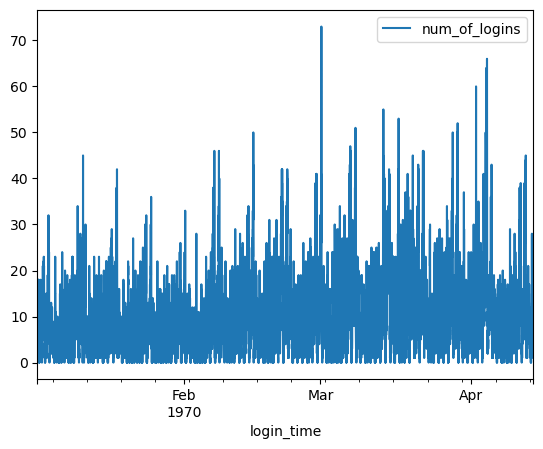

In [108]:
#visualize the data
logins_15min_agg.plot()

<Axes: xlabel='login_time'>

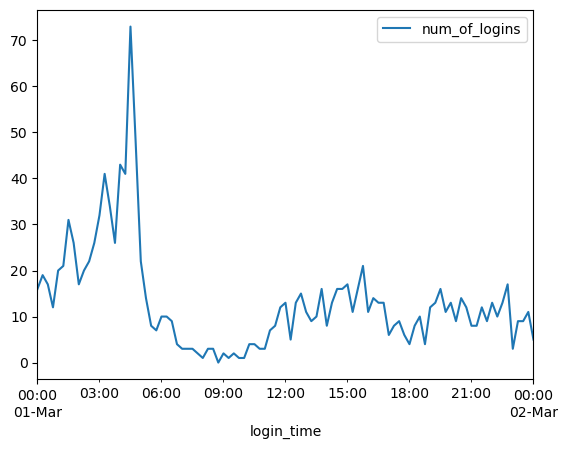

In [109]:
logins_15min_agg.loc['1970-03-01 00:00:00':'1970-03-02 00:00:00'].plot()

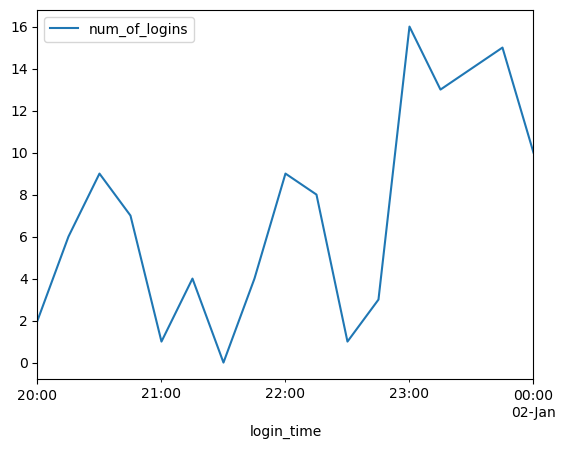

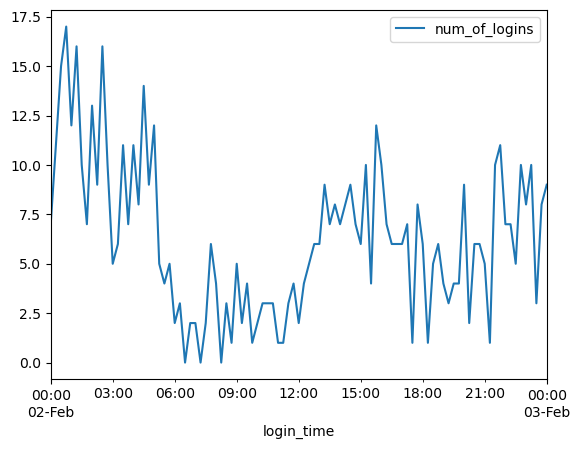

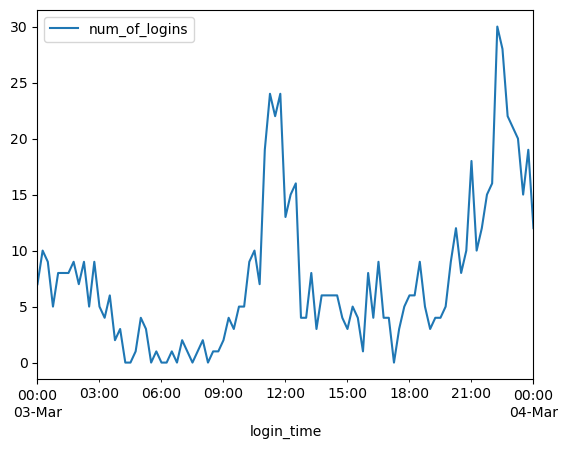

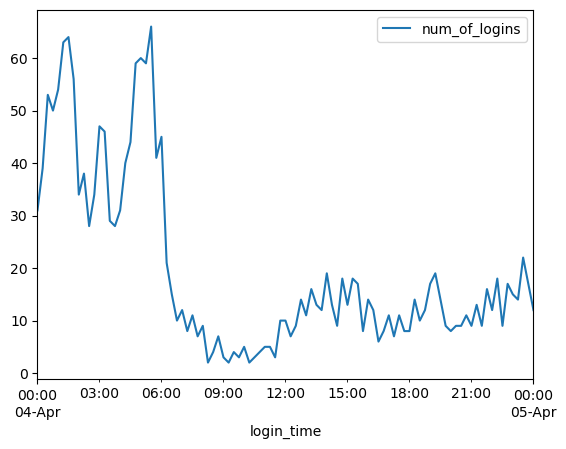

In [110]:
# A sample of logins on the first day of every month from Jan 1970 to April 1970
for i in range(4):
    logins_15min_agg.loc[f'1970-0{i+1}-0{i+1} 00:00:00':f'1970-0{i+1}-0{i+2} 00:00:00'].plot()

In [111]:
logins_daily_agg = logins_df.resample(rule='D', on='login_time',).agg({'login_time': 'count'})
logins_weekly_agg = logins_df.resample(rule='W', on='login_time',).agg({'login_time': 'count'})
logins_monthly_agg = logins_df.resample(rule='M', on='login_time',).agg({'login_time': 'count'})

<Axes: xlabel='login_time'>

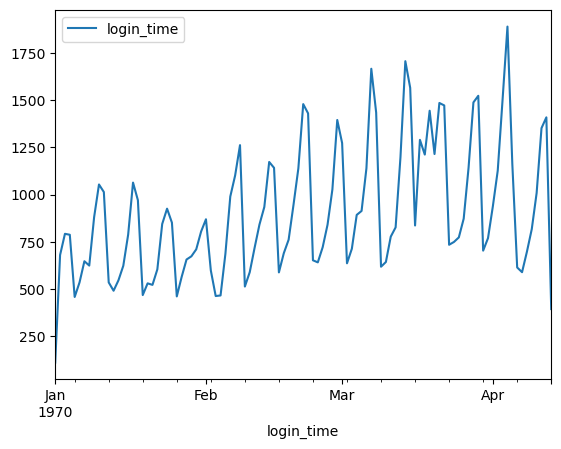

In [112]:
logins_daily_agg.plot()

<Axes: xlabel='login_time'>

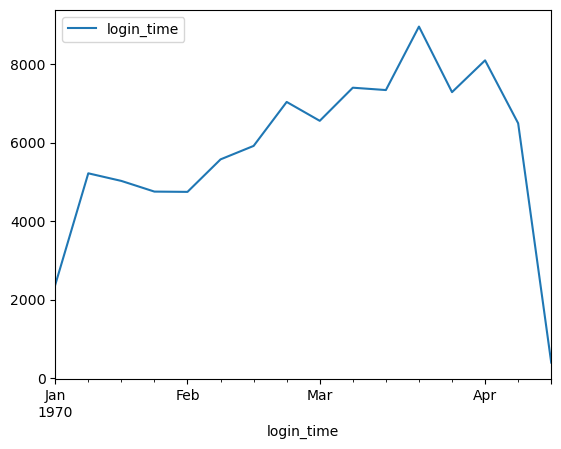

In [113]:
logins_weekly_agg.plot()

<Axes: xlabel='login_time'>

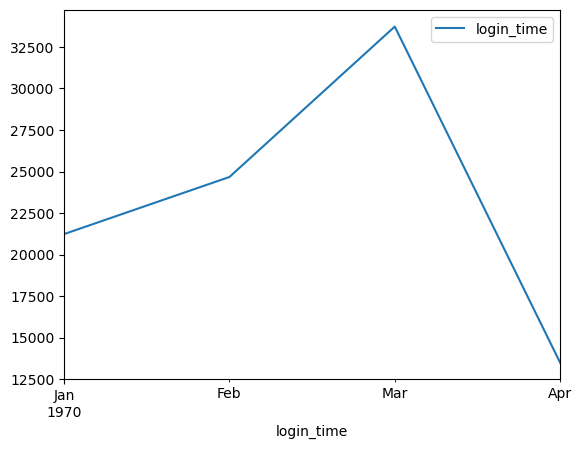

In [114]:
logins_monthly_agg.plot()

<Axes: xlabel='login_time'>

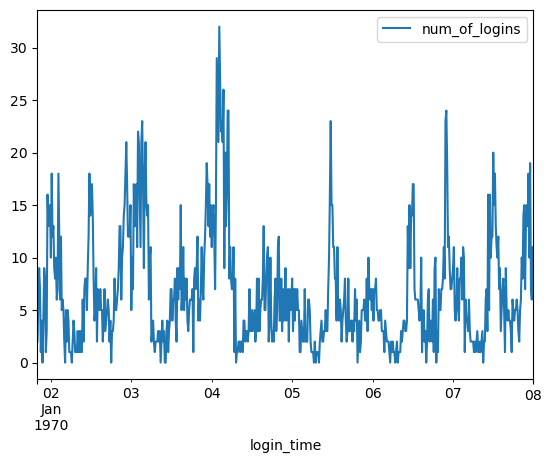

In [115]:
logins_15min_agg.loc['1970-01-01 20:00:00':'1970-01-08 00:00:00'].plot()

<Axes: xlabel='login_time'>

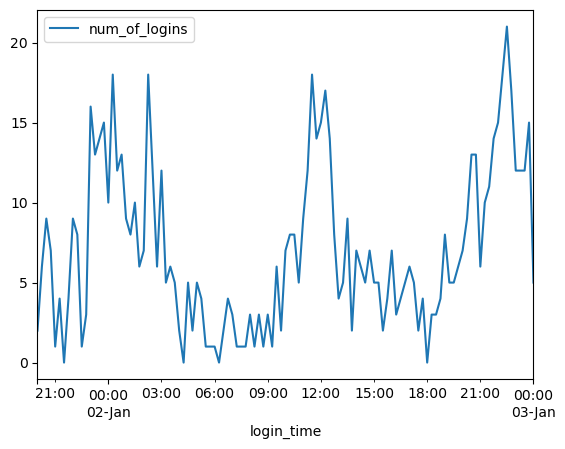

In [116]:
logins_15min_agg.loc['1970-01-01 20:00:00':'1970-01-03 00:00:00'].plot()

When taking the initial aggregate of time at 15min intervals between Jan and February it was a useless slop really.  However filtering it down to a given day, the data was clearer but gave now real indication of a pattern.  This held true when checking the login times of the first days of every month between January and April.  When data was aggregated Daily we saw a definite pattern arise however, weekly and montyly the data was abstracted out too much and only really indicated the general direction of the data. When checked the logins at 15min intervals over the course of a week, the data followed a pseudorandom pattern.  Thus if we were to model this data our best bet would be to use daily login aggregates which conformed to the strongest pattern.

### PART 2: EXPERIMENT AND METRICS DESIGN
***

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.<br>
__Q1:__ What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?<br>

__A1:__ I would be checking to see if driver partners begin to establish complementary services in both cities.  So in brief, I would take a measurement of let's say "bi-city" driver partners prior to beginning reimbursment (or much more simply, not exacting the toll in the first place) and then follow the time series and see if that number begins to consistintantly rise.<br> 

__Q2:__ Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
- how you will implement the experiment
- what statistical test(s) you will conduct to verify the significance of the
observation
- how you would interpret the results and provide recommendations to the city
operations team along with any caveats.<br>

__A2:__ First I would perform analysis inorder to determine if, infact, the driver partners aren't offering services in both cities due to the double toll bridge.  Assuming that is indeed the case, or that the Ultimate managers had another data team make that determination, I would as previously mentioned make a head count of bi-city driver partners.  Then I would collect and observe the change in behavior, specifically, does the number of bi-city driver partner go up? I would conduct t-tests to determin if the observations I make are statistically significant compared to the original data before the change, effectively a time-series AB test.  The system is a dynamic one so I would be generous in my interpretation of the data whilst conservative in my measurements of change.  Hope for the best prepare for the worst as the saying goes.  I would present these changes, simply and directly likely graphing the time utilizing that specific metric for success, so that city operations could in fact see the benefit, or failure of our original assumption, and recommend further data collection to verify what other factors affect the lack of bi-city driver partner services.


### PART 3: PREDICTIVE MODELING
***

In [117]:
ultimate_df = pd.read_json('ultimate_data_challenge.json')

In [118]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [119]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [120]:
ultimate_df[ultimate_df['avg_rating_of_driver'].isna() == True]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


<Axes: title={'center': "Scatterplot of 'avg_rating_of_driver' by 'avg_rating_by_driver'"}, xlabel='avg_rating_of_driver', ylabel='avg_rating_by_driver'>

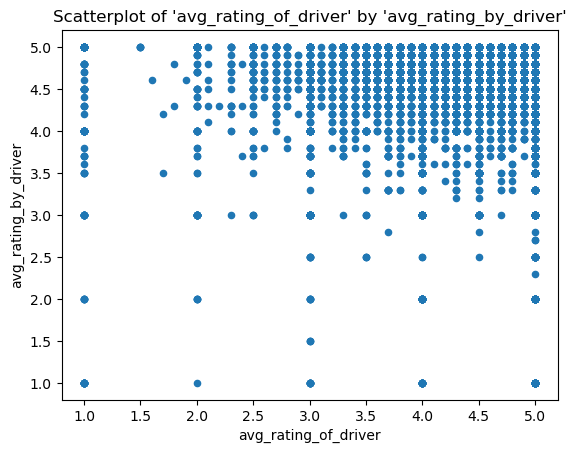

In [125]:
ultimate_df[['avg_rating_of_driver', 'avg_rating_by_driver']].plot(
    kind="scatter", 
    title="Scatterplot of 'avg_rating_of_driver' by 'avg_rating_by_driver'",
    x='avg_rating_of_driver',
    y='avg_rating_by_driver',
    )

In [127]:
ultimate_df.fillna(value=np.random.choice([3.0, 3.5, 4.0, 4.5, 5.0]), inplace=True)

In [128]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,2.278200,4.585062,1.074764,8.849536,60.926084,5.796827,4.77704
std,3.792684,0.566217,0.222336,19.958811,37.081503,5.707357,0.44610
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.70000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.00000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.00000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.00000
